In [171]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.font_manager import FontProperties
import branca.colormap as cm
import folium
import json
plt.style.use("seaborn-darkgrid")
# plt.style.available

In [172]:
dataframe= pd.read_csv('/Users/danait/documents/galvanize/capstone/global_ecological_footprint/data/countries.csv', header= 0)
countries_dataframe= dataframe.copy()


In [173]:
# functions for data cleaning
# df= pandas DataFrame


In [174]:
# droping columns 
def drop_col(df,index,inplace):
    return df.drop(index, inplace= inplace)



In [175]:

def find_NaN_values(df, col):
    return df[(pd.isna(df[col])== True)]


In [176]:
def fillna(df, col, dic):
    '''function replaces NaN values in a col given a 
    dictionary of the values to replace it with '''
    while df[col].isnull().sum() >0:
        fillna_value={}
        for k,v in dic.items():
            fillna_value[col]=v
            df.fillna(fillna_value, inplace= True, limit=1)
        return df

In [177]:
def clean_column_values(df,col):
    '''cleans column values and turns them to float'''
    final_col_output= []
    for value in (df[str(col)].tolist()):
        joinstring=''
        for item in value:
              if item.isnumeric()==True or item== ".":
                    joinstring+=item
        final_col_output.append(float(joinstring))
    df[str(col)]= final_col_output
    return df


In [178]:
def scatter_plot_with_small_subplot (ax,color, x, y, xtitle, ytitle, title, xlim,  ylim, ax1_location):
    '''returns a scatter plot zoomed in to show the points that you want(eliminate outliers)
    and another subplot that shows all the points '''
    fig= plt.figure(edgecolor= 'black')
    ax= fig.add_subplot(111)
    ax.scatter(x,y, s= 80, c= "purple")
    ax.set_xlabel(xtitle, fontsize= 20)
    ax.set_ylabel(ytitle, fontsize= 20)
    ax.set_title(title, fontsize=22, fontweight= "bold")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.figure()
    #small subplot 
    ax1= ax.inset_axes(ax1_location)
    
    ax1.scatter(x, y, color= color, s= 40 )
    ax1.set_xlim(0,1450)
    ax1.set_ylim(0,20 )
    
    return None


In [179]:
def groupby_total(df,groupby_col, columns):
    "groupby a certain column and find the sum"
    return df.groupby(groupby_col).sum()[columns]


In [180]:
def clean_col_name(df_, replace, replace_with):
    cols= df_.columns.tolist()
    cols= [col.replace(replace,replace_with) for col in cols]
    df_.columns= cols
    return df_

In [181]:
def line_graphs(df_region, x_value, ylabel, title):
    "given dataframe and x value it returns a line graph with multiple plots inside it"
    fig= plt.figure()
    plt.style.use("seaborn-darkgrid")
    row= 0
    for elem in df_region.index:
        plt.figure(1,1,row+1)
        region= pd.DataFrame({ 'column':x_value, "value":df_region.iloc[row,:] })
        row+=1
        plt.plot(region["column"], region["value"], label= elem)
    plt.legend(fancybox=True, fontsize=18)
    plt.ylabel(ylabel)
    plt.title(title,fontsize=22, fontweight= "bold" )
#     matplotlib.rc('axes', xsize=12)
    size=22
    params = {
          'figure.figsize': (15,8),
          'axes.labelsize': 20,
          'axes.titlesize': 22,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
    plt.rcParams.update(params)
    return None

In [ ]:
def group_by(df, colum):
    "groups by certain colum"
    return df.groupby("colum")

In [ ]:
def groupby_sum(df, groupcol, lst_col):
    "groups by groupcol and includes certain columns returns new data frame"
    return df.groupby(groupcol).sum()[lst_col]
    

In [ ]:
def sort_dataframe(df, col, ascending= True):
    "return sorted dataframe by the given column"
    return df.sort_values([col], ascending= [False])

In [ ]:
def reginal_biocapacity(df_region, title, ytitle):
    '''takes a dataframe, cleans the columns and uses the columns as lables on the x-axis
    and plots the rows at each axis
    '''
    fig= plt.figure(figsize= (10,8))
    plt.style.use("seaborn-darkgrid")
    row= 0
    for elem in df_region.index:
        plt.figure(1,1,row+1)
        region= pd.DataFrame({ 'column':clean_col_name(df_region, "Footprint", "").columns, "value":df_region.iloc[row,:]})
        row+=1
        plt.plot(region["column"], region["value"], label= elem)
    plt.legend(fancybox=True, fontsize=18)
    plt.ylabel(ytitle)
    plt.title(title,fontsize=22, fontweight= "bold" )
#     matplotlib.rc('axes', xsize=12)
    size=22
    params = {
          'figure.figsize': (15,8),
          'axes.labelsize': 20,
          'axes.titlesize': 22,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
    plt.rcParams.update(params)
    return None

In [ ]:
def heat_map(data, columns):
    '''creates heatmap by locating the countrycode in my dataframe with data longitue and latitude'''
    state_geo = country_geo
    state_data = data
 
    # Initialize the map:
    m = folium.Map( location=[37, -102],zoom_start=2)
    m.fit_bounds([[52.193636, -2.221575], [52.636878, -1.139759]])
    # Add the color for the chloropleth:
    m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['CountryCode', 'Biocapacity Deficit or Reserve'],
    key_on='feature.id',
    fill_color='RdYlGn',
    nan_fill_color= "white",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Biocapacity Deficit or Reserve'
    folium.LayerControl().add_to(m)
    return None

In [ ]:
data2= df[['Country',"Region", 'Biocapacity Deficit or Reserve', "Total Biocapacity", "Total Ecological Footprint"]]
data3
data= data2.join(countrycode.set_index("Country"), on= "Country", how= 'left')
data.head(5)

In [ ]:
def subset_dataframe(df, columns):
    '''return the columns you want in a dataframe'''
    return df[[columns]]
def join_df(df1, df2, set_index, on, how):
    '''returns joined dataframs with th index specified, on certain column, and how you want to join it '''
    return df2.join(df1.set_index(set_index, on=on, how=how))

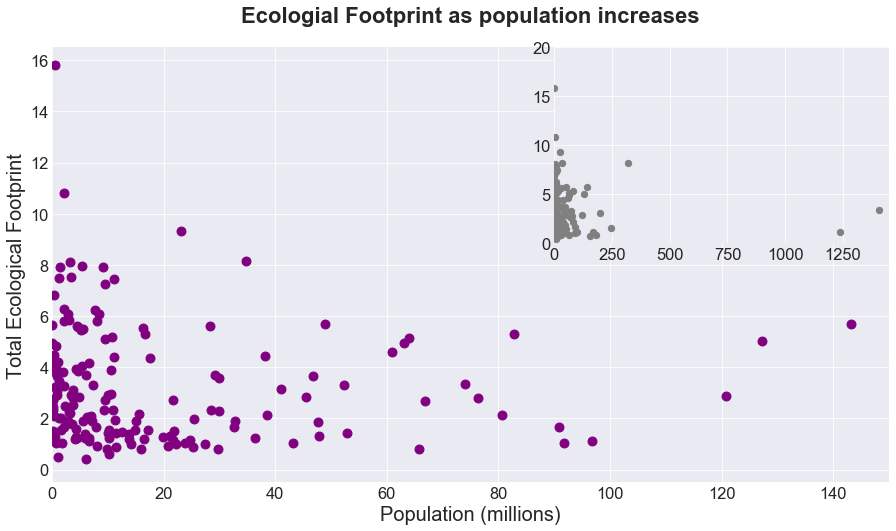

<Figure size 1080x576 with 0 Axes>

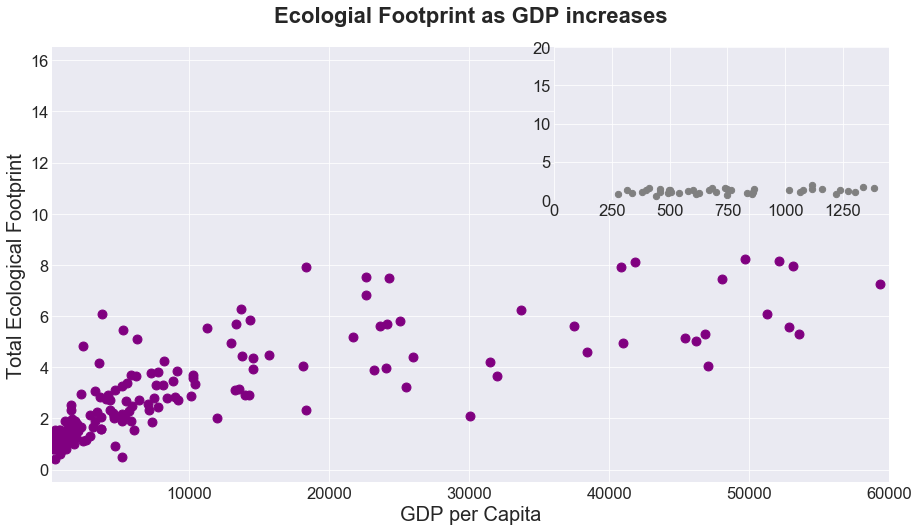

<Figure size 1080x576 with 0 Axes>

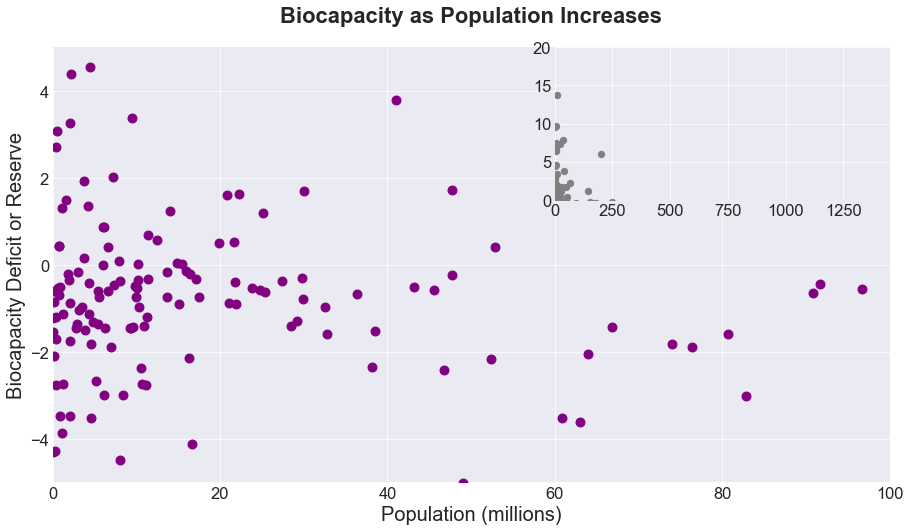

<Figure size 1080x576 with 0 Axes>

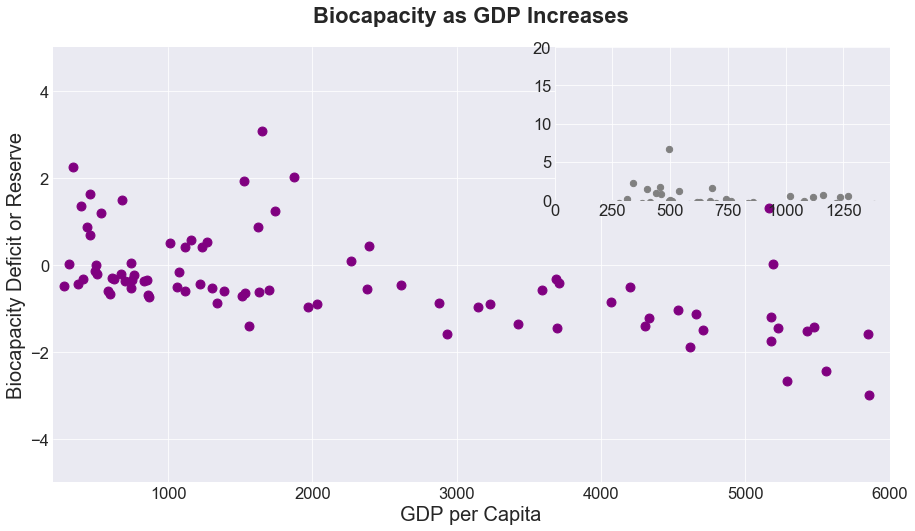

<Figure size 1080x576 with 0 Axes>

In [182]:
if __name__ == "__main__":
    countrycode= pd.read_csv('/Users/danait/documents/galvanize/capstone/global_ecological_footprint/data/three_country_code.csv', header= 0)
    country_geo = '/Users/danait/documents/galvanize/capstone/global_ecological_footprint/data/world-countries.json'
    index_cols_drop=[4,7,18,24,29,30,49, 57, 60,63,70,115,120,123,128, 145,184]
    inplace= True
    df= countries_dataframe  
    fillna_HDI_col= {'Cayman Islands': 0.888, "Côte d'Ivoire": 0.516 ,'French Guiana':0.789, 
             'Guadeloupe':0.841, "Korea, Democratic People's Republic of": 0.733, 'Martinique':0.854, 
             'Réunion':0.836 ,'Somalia':0.364}
    fillna_GDP_col= {'Cayman Islands': "$81124.51",'French Guiana':"$18313", 'Guadeloupe':"$25479",
             "Korea, Democratic People's Republic of": "$1700", 'Martinique':"$30056", 
             'Réunion':"$6200" ,'Somalia':'$314.54', 'Syrian Arab Republic':'$2032.62' }
    
    
    #drop rows with many null columns 
    countries_dataframe= drop_col(df,index_cols_drop,inplace)
    
    #fill NaN values for the HDI column
    countries_dataframe= fillna(df, "HDI", fillna_HDI_col)
    
    #fill NaN values for GDP per Capita column
    countries_dataframe= fillna(df, 'GDP per Capita',fillna_GDP_col )
    
    #cleans the $ sign or other elements from columns
    countries_dataframe= clean_column_values(df,'GDP per Capita')
    
    #plots
    
    #scatter plot of ecological footprint as population increases     
    color= "gray"
    x= df['Population (millions)']
    y= df["Total Ecological Footprint"]
    xtitle= "Population (millions)"
    ytitle= "Total Ecological Footprint"
    title= "Ecologial Footprint as population increases"
    xlim= (0,150)
    ax1_location= [0.6, 0.55, 0.40, .45]
    ylim=(-.50,16.5) 
    ax="ax" 
    eco_pop_increase= scatter_plot_with_small_subplot(ax,color, x, y, xtitle, ytitle, title, xlim,  ylim, ax1_location)
    

    #scatter plot of ecological footprint as GDP increases
    x= df['GDP per Capita']
    y= df["Total Ecological Footprint"]
    xtitle= "GDP per Capita"
    ytitle= "Total Ecological Footprint"
    title= "Ecologial Footprint as GDP increases"
    xlim= (200,60000)
    ylim= (-.50,16.5) 
    ax1_location= [0.6, 0.65, 0.40, .35]
    eco_GDP_increase=scatter_plot_with_small_subplot(ax,color, x, y, xtitle, ytitle, title, xlim,  ylim, ax1_location)
    
    
    #biocapacity as population increases
    x= df['Population (millions)']
    y= df["Biocapacity Deficit or Reserve"]
    xtitle= "Population (millions)"
    ytitle= "Biocapacity Deficit or Reserve"
    title= "Biocapacity as Population Increases"
    xlim= (0,100)
    ax1_location= [0.6, 0.65, 0.40, .35]
    ylim= (-5,5) 
    biocap_pop_increase=scatter_plot_with_small_subplot(ax,color, x, y, xtitle, ytitle, title,xlim,  ylim, ax1_location)
    
    #biocapacity as GDP increases
    x= df['GDP per Capita']
    y= df["Biocapacity Deficit or Reserve"]
    xtitle= "GDP per Capita"
    ytitle= "Biocapacity Deficit or Reserve"
    title= "Biocapacity as GDP Increases"
    xlim= (200,6000)
    ax1_location= [0.6, 0.65, 0.40, .35]
    ylim= (-5,5) 
    biocap_GDP_increase=scatter_plot_with_small_subplot(ax,color, x, y, xtitle, ytitle, title, xlim, ylim, ax1_location) 
    
    
    #group dataframes 
    
    #regionally grouped dataframe for ecologial footprint
    columns= ["Cropland Footprint", "Grazing Footprint", "Forest Footprint", "Carbon Footprint", "Fish Footprint", "Total Ecological Footprint"]
    Regional_ecofootprint= groupby_total(countries_dataframe, "Region",columns)
    
    #clean the Regionally grouped column names
    region_ecofootprint= clean_col_name(Regional_ecofootprint, "Footprint", "")
    
    #regionally grouped dataframe for biocapcity 
    columns=["Cropland", "Grazing Land", "Forest Land", "Fishing Water", "Urban Land", "Total Biocapacity"]
    regional_biocap=groupby_total(countries_dataframe, "Region",columns)
    
    #regionally grouped dataframe for ecological footprint, biocapacity, and biocapacity deficit or reserve 
    columns= ["Total Biocapacity",'Total Ecological Footprint','Biocapacity Deficit or Reserve']
    regional_bio_eco=groupby_total(countries_dataframe, "Region",columns) 
    
    
    #graph line plots
    
    #line graph of total regional biocapacity for each categorie 
    #reg_biocap_graph= line_graphs(regional_biocap,regional_biocap.columns, 'Biocapacity by category', 'Total Regional Biocapacity' )

    #line graph of total regional ecological footprint for eat categorie
    #reg_ecofoot_graph= line_graphs(region_ecofootprint,region_ecofootprint.columns, 'Ecological footprint by category', 'Total Regional Ecological Footprint' )
    
    #line graph of ecological footprint, biocapacity, and regional biocapacity deficient or reserv
    #reg_bio_eco_graph= line_graphs(regional_bio_eco,regional_bio_eco.columns, 'global hectares per person', "Reginal Biocapacity vs. Ecological Demand" )
    
    #manipulate dataframe to plot regional line graphs for each category measurment of biocapacity 
    region_ecofootprint= groupby_sum(countries_dataframe, "Region", ["Cropland Footprint", "Grazing Footprint", "Forest Footprint", "Carbon Footprint", "Fish Footprint", "Total Ecological Footprint"])
    region_biocapacity= groupby_sum(countries_dataframe, "Region", ["Cropland", "Grazing Land", "Forest Land", "Fishing Water", "Urban Land", "Total Biocapacity"])
    region_bio_def_res=groupby_sum(countries_dataframe, "Region", ["Total Biocapacity",'Total Ecological Footprint','Biocapacity Deficit or Reserve'])
    
    #plot
    regbio_graph= reginal_biocapacity(region_biocapacity, "regional biocapacity", "biocapacity")
    regeco_graph= reginal_biocapacity(region_ecofootprint, "regional ecological footprint", "ytitle")
    
    #country code of folium map 
    countrycode= clean_col_name(countrycode, "Name", "Country")
    countrycode= clean_col_name(countrycode, "Code", "CountryCode")
    heat_map(data, ['CountryCode', 'Biocapacity Deficit or Reserve'])

In [163]:
df3= countries_dataframe.copy()

In [169]:

#scatter plot of ecological footprint as population and GDP increase 2 plots 

# fig= plt.figure(figsize=( 17,15), edgecolor= 'black')
 
# ax1= fig.add_subplot(2,1,1)
# ax1.scatter(df3['Population (millions)'],df3["Total Ecological Footprint"], color= "gray")
# ax1.set_xlabel("Population (millions)", fontsize= 20)
# ax1.set_ylabel("Total Ecological Footprint", fontsize= 20)
# ax1.set_title("Ecologial Footprint as Population Increases", fontsize=18, fontweight= "bold")
# ax1.set_xlim(0,150)
# ax1.set_ylim(0,16
# plt.figure()
# ax1a= ax1.inset_axes([0.6, 0.55, 0.40, .45]) 
# ax1a.scatter(df3['Population (millions)'],df3["Total Ecological Footprint"])




# ax2=fig.add_subplot(2,1,2)
# ax2.scatter(df3['GDP per Capita'],df3["Total Ecological Footprint"], color= "red")
# ax2.set_xlabel("GDP per Capita", fontsize= 20)
# ax2.set_ylabel("Total Ecological Footprint", fontsize= 20)
# ax2.set_title("Ecologial Footprint as GDP Increases", fontsize=18, fontweight= "bold")
# ax2.set_xlim(200,60000)
# ax2.set_ylim(-.50,16.5)
# plt.figure()
# ax2a= ax2.inset_axes([0.6, 0.65, 0.40, .35])
# plt.savefig('Compare_GDP_VS_population_increases_footprint.png', bbox_inches='tight') 
# ax2a.scatter(df3['GDP per Capita'],df3["Total Ecological Footprint"])
# plt.tight_layout()
##scatter plot of ecological footprint as population and GDP increase 2 plots 


SyntaxError: invalid syntax (<ipython-input-169-7b2ea484646a>, line 10)

In [183]:
region_ecofootprint

,Cropland,Grazing,Forest,Carbon,Fish,Total Ecological
Region,,,,,,
Africa,19.48,11.48,15.50,29.04,4.69,82.18
Asia-Pacific,16.53,6.70,10.92,41.25,5.83,83.49
European Union,23.59,6.25,15.40,78.34,2.78,129.63
Latin America,14.85,12.57,11.91,56.41,4.37,101.88
Middle East/Central Asia,13.77,4.87,3.70,67.82,1.48,93.25
North America,2.59,0.63,1.87,10.90,0.24,16.39
Northern/Eastern Europe,7.79,1.76,5.07,24.32,0.66,40.18


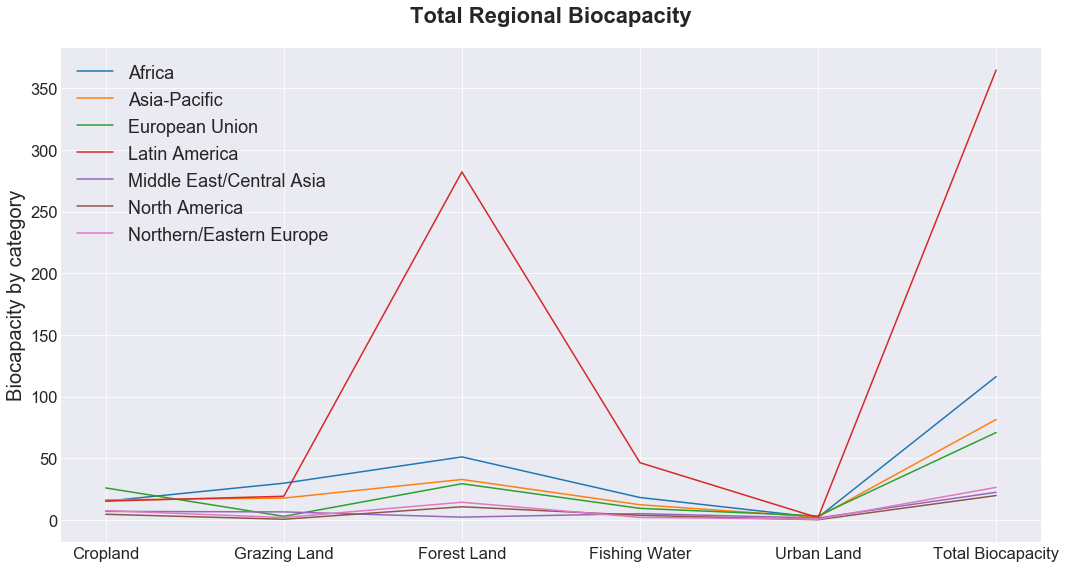

In [184]:

    
reg_biocap_graph= line_graphs(regional_biocap,regional_biocap.columns, 'Biocapacity by category', 'Total Regional Biocapacity' )
plt.tight_layout()

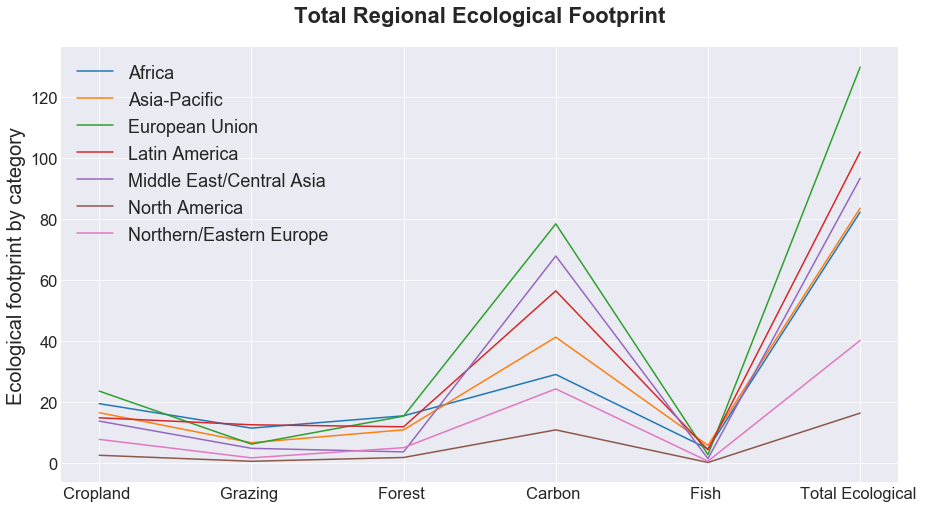

In [185]:
reg_ecofoot_graph= line_graphs(region_ecofootprint,region_ecofootprint.columns, 'Ecological footprint by category', 'Total Regional Ecological Footprint' )


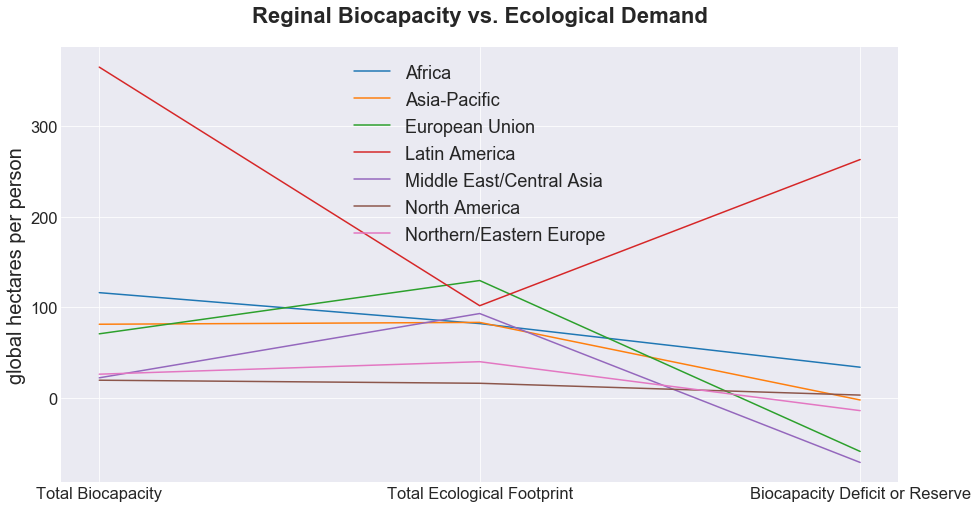

In [186]:
reg_bio_eco_graph= line_graphs(regional_bio_eco,regional_bio_eco.columns, 'global hectares per person', "Reginal Biocapacity vs. Ecological Demand" )

In [188]:
# fig= plt.figure(edgecolor= 'black')
# ax1= fig.add_subplot(2,2,1)
# row=0
# for elem in 
# ax1.set_ylabel('p-value')
# ax1.set_xlabel('number of correct drinks')
# ax1.set_title('p-value= .30')
# ax1.set_xlim(40,100,20)
# num1_x= np.linspace(1,137, num=137)
# ax1.bar(num1_x, binomial_num1.pmf(num1_x), color= 'grey')
# fill= range(72, 138)
# ax1.bar(fill, binomial_num1.pmf(fill), color= 'red' )

In [189]:
def line_graphs(df_region, x_value, ylabel, title):
    "given dataframe and x value it returns a line graph with multiple plots inside it"
#     fig= plt.figure()
#     plt.style.use("seaborn-darkgrid")
    row= 0
    for elem in df_region.index:
        plt.figure(1,1,row+1)
        region= pd.DataFrame({ 'column':x_value, "value":df_region.iloc[row,:] })
        row+=1
        plt.plot(region["column"], region["value"], label= elem)
    plt.legend(fancybox=True, fontsize=18)
    plt.ylabel(ylabel)
    plt.title(title,fontsize=22, fontweight= "bold" )
#     matplotlib.rc('axes', xsize=12)
    size=22
    params = {
          'figure.figsize': (15,8),
          'axes.labelsize': 20,
          'axes.titlesize': 22,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
    plt.rcParams.update(params)
    return None

In [190]:
df_region_ecofp= countries_dataframe.groupby("Region").sum()[["Cropland Footprint", "Grazing Footprint", "Forest Footprint", "Carbon Footprint", "Fish Footprint", "Total Ecological Footprint"]]


In [191]:
df_region_biocapacity= countries_dataframe.groupby("Region").sum()[["Cropland", "Grazing Land", "Forest Land", "Fishing Water", "Urban Land", "Total Biocapacity"]]



In [192]:
df_region_def_res= countries_dataframe.groupby("Region").sum()[["Total Biocapacity",'Total Ecological Footprint','Biocapacity Deficit or Reserve']]

In [193]:
fig= plt.figure(figsize=( 12,6), edgecolor= 'black')


<Figure size 864x432 with 0 Axes>

In [194]:
ax1= fig.add_subplot(2,2,1)
row= 0
for elem in df_region_ecofp.index:
    region= pd.DataFrame({ 'column':clean_col_name(df_region_ecofp, "Footprint", "").columns, "value":df_region_ecofp.iloc[row,:]})
    row+=1
    ax1.plot(region["column"], region["value"], label= elem)

    ax1.set_ylabel('Ecological footprint by category')
    ax1.set_title('Total Regional Ecological Footprint')

ax1

In [195]:
ax2= fig.add_subplot(2,2,2)
row= 0
for elem in df_region_biocapacity.index:
    region= pd.DataFrame({ 'column':clean_col_name(df_region_biocapacity, "Footprint", "").columns, "value":df_region_biocapacity.iloc[row,:]})
    row+=1
    ax2.plot(region["column"], region["value"], label= elem)

    ax2.set_ylabel('Biocapacity by category')
    ax2.set_title('Total Regional Biocapacity')
plt.show()
ax2

In [196]:
ax3= fig.add_subplot(2,2,3)
row= 0
for elem in df_region_def_res.index:
    region= pd.DataFrame({ 'column':clean_col_name(df_region_def_res, "Footprint", "").columns, "value":df_region_def_res.iloc[row,:]})
    row+=1
    ax3.plot(region["column"], region["value"], label= elem)

    ax3.set_ylabel('global hectares per person')
    ax3.set_title('Reginal Biocapacity vs. Ecological Demand"', fontweight= "bold" )
plt.show()
ax3

In [200]:
#get folium map
countrycode= pd.read_csv('/Users/danait/documents/galvanize/capstone/global_ecological_footprint/data/three_country_code.csv', header= 0)
countrycode.head(5)
clean_col_name(countrycode, "Name", "Country")
clean_col_name(countrycode, "Code", "CountryCode")
countrycode.tail(20)

,Country,CountryCode
229,Turks and Caicos Islands,TCA
230,Tuvalu,TUV
231,Uganda,UGA
232,Ukraine,UKR
233,United Arab Emirates,ARE
234,United Kingdom,GBR
235,United States of America,USA
236,United States Minor Outlying Islands,UMI
237,Uruguay,URY
238,Uzbekistan,UZB


In [201]:
data2= df[['Country',"Region", 'Biocapacity Deficit or Reserve', "Total Biocapacity", "Total Ecological Footprint"]]
outlier_countries= data2.sort_values(["Total Biocapacity"],ascending= False).head(3)
outlier_countries.set_index("Country")


,Region,Biocapacity Deficit or Reserve,Total Biocapacity,Total Ecological Footprint
Country,,,,
French Guiana,Latin America,109.01,111.35,2.34
Suriname,Latin America,85.08,89.33,4.25
Guyana,Latin America,63.51,66.58,3.07


In [202]:
data2= df[['Country',"Region", 'Biocapacity Deficit or Reserve', "Total Biocapacity", "Total Ecological Footprint"]]

data= data2.join(countrycode.set_index("Country"), on= "Country", how= 'left')
data.head(5)
# data.isna().sum()
data[(pd.isna(data['CountryCode'])== True)]

,Country,Region,Biocapacity Deficit or Reserve,Total Biocapacity,Total Ecological Footprint,CountryCode


In [205]:
#elimenate_oulier second heatmap graph 
outlier_countries= data.iloc[[62,160,75],:]
# data.drop([62,160,75], inplace= True)
outlier_countries.set_index("Country")

,Region,Biocapacity Deficit or Reserve,Total Biocapacity,Total Ecological Footprint,CountryCode
Country,,,,,
Guinea-Bissau,Africa,1.49,3.03,1.53,GNB
United States of America,North America,-4.46,3.76,8.22,USA
Jordan,Middle East/Central Asia,-1.89,0.21,2.10,JOR


In [207]:
# Import libraries
import json
import pandas as pd
import folium
 

state_geo = country_geo
 

state_data = data
 
# Initialize the map:
m = folium.Map( location=[37, -102],zoom_start=2)
m.fit_bounds([[52.193636, -2.221575], [52.636878, -1.139759]])
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['CountryCode', 'Biocapacity Deficit or Reserve'],
 key_on='feature.id',
 fill_color='RdYlGn',
 nan_fill_color= "white",
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Biocapacity Deficit or Reserve'
)
folium.LayerControl().add_to(m)
 
# Save to html
#m.save('#292_folium_chloropleth_USA1.html')

NameError: name 'country_geo' is not defined